# Analysis of Factors Influencing Movie Success

## Aim:

The project aims to pinpoint the key factors that influence a movie's success, focusing on variables such as the production company and the movie's budget. By analyzing data with Python, the goal is to offer insights that will assist movie production companies in making informed decisions about movie production, partnerships, and resource allocation to enhance their chances of success.

- **Skills**: data cleaning, data analysis, correlation matrices, hypothesis testing, data visualization.

- **Technology**: Python, Pandas, Numpy, Seaborn, Matplotlib, SciPy.

## Import the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")

# Data Cleaning

## Load the imdb movies dataset

In [2]:
df=pd.read_csv('dataset\imdb_movies_data.csv') # load the csv file
df.head() # print top 5 rows

,id,primaryTitle,originalTitle,isAdult,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,Kate & Leopold,0,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The Aristocats,The AristoCats,0,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,Kelly's Heroes,0,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,M*A*S*H,0,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,Patton,0,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [3]:
df.columns

Index(['id', 'primaryTitle', 'originalTitle', 'isAdult', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'budget', 'gross',
       'release_date', 'directors'],
      dtype='object')

In [4]:
# drop unuseful columns 
df.drop(['primaryTitle', 'isAdult'],axis=1,inplace=True)  # inplace with make change in the original file
df.head()

,id,originalTitle,runtimeMinutes,genres,averageRating,numVotes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [5]:
# rename column name
d={'originalTitle':'title',
   'runtimeMinutes':'runtime',
   'averageRating':'rating',
   'numVotes':'no_of_votes'
   }

In [6]:
df.rename(columns=d, inplace=True)
df.head()

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors
0,tt0035423,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,"December 11, 2001",James Mangold
1,tt0065421,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,"December 11, 1970",Wolfgang Reitherman
2,tt0065938,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,"January 1, 1970",Brian G. Hutton
3,tt0066026,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,"January 25, 1970",Robert Altman
4,tt0066206,Patton,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,"February 4, 1970",Franklin J. Schaffner


In [7]:
df.columns

Index(['id', 'title', 'runtime', 'genres', 'rating', 'no_of_votes', 'budget',
       'gross', 'release_date', 'directors'],
      dtype='object')

In [8]:
# df.columns = map(str.lower, df.columns) # not required here 

In [9]:
# check the rows and columns of this dataset
df.shape  

(3348, 10)

In [10]:
# check data type for each column to identify any wrong data type for a colum
df.dtypes   # df.info()

id               object
title            object
runtime           int64
genres           object
rating          float64
no_of_votes       int64
budget            int64
gross           float64
release_date     object
directors        object
dtype: object

We can see release_date column is read as string. It better to transform it to Pandas datetime object for plotting as well as extracting month info easily

In [11]:
# convert release_date to pandas datetime object 
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [12]:
# statistic values for this data 
df.describe()

,runtime,rating,no_of_votes,budget,gross,release_date
count,3348.000000,3348.00000,3.348000e+03,3.348000e+03,3.297000e+03,3214
mean,112.739845,6.73853,2.155492e+05,5.039280e+07,1.681599e+08,2006-03-06 04:19:51.785936512
min,63.000000,1.00000,5.000400e+04,1.800000e+01,2.100000e+02,1970-01-01 00:00:00
25%,98.000000,6.20000,7.897700e+04,1.500000e+07,3.623022e+07,2000-04-03 12:00:00
50%,109.000000,6.80000,1.290400e+05,3.200000e+07,8.821516e+07,2008-03-17 00:00:00
75%,124.000000,7.30000,2.468495e+05,6.800000e+07,2.008117e+08,2014-06-15 06:00:00
max,242.000000,9.30000,2.817283e+06,3.560000e+08,2.923706e+09,2023-10-25 00:00:00
std,19.927703,0.88221,2.480211e+05,5.178614e+07,2.366507e+08,NaN


We can see missing value in rease_data column. Let's check missing values for all the columns.

## Checking for missing data

In [13]:
# check missing value in each column
df.isnull().sum()

id                0
title             0
runtime           0
genres            0
rating            0
no_of_votes       0
budget            0
gross            51
release_date    134
directors         0
dtype: int64

There are 51 missing values in gross column and 134 missing values in release_dat column. Let's clean those missing value, simply droping it. 

## Drop all the observations that have null value

In [14]:
# drop all the row that contains any missing values
df.dropna(inplace=True)

In [15]:
# recheck and verify missing values
df.isnull().sum()

id              0
title           0
runtime         0
genres          0
rating          0
no_of_votes     0
budget          0
gross           0
release_date    0
directors       0
dtype: int64

All good now, there is no missing values now.

In [16]:
# recheck the number of clean record
df.shape

(3163, 10)

## Chek for duplicates records

In [17]:
# check if there are some duplicates 
df.duplicated().sum()

np.int64(0)

There is no duplicate records in the dataset. 

In [18]:
# drop the duplicates
# df.drop_duplicates(inplace=True)     # No duplicate so uncommented it

In [19]:
## recheck to confim duplicates
# df.duplicated().sum()    # No duplicate so uncommented it

In [20]:
# check each columns number of unique values 
df.nunique()

id              3163
title           3120
runtime          124
genres           281
rating            67
no_of_votes     3148
budget           329
gross           3162
release_date    2692
directors       1309
dtype: int64

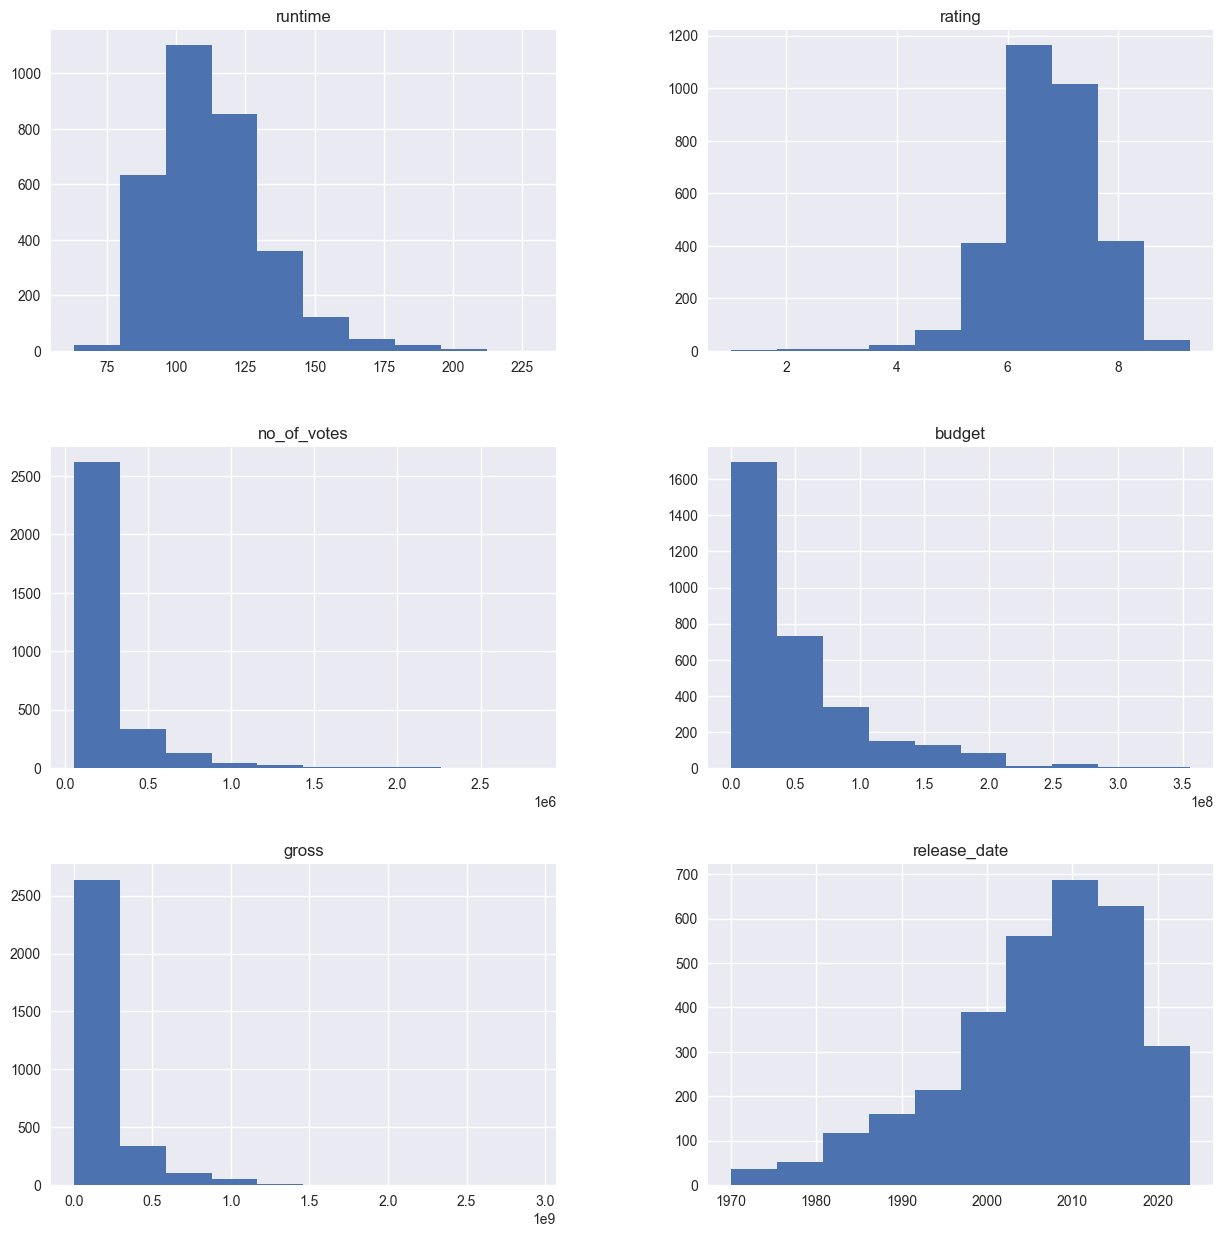

In [21]:
# visulize each variables on histogram plot
df.hist(figsize=(15,15));

## Add new year and month column from release_date

In [22]:
df['year'] = df.release_date.dt.year
df['month'] = df.release_date.dt.month_name().str.slice(stop=3) # month name in short

In [23]:
df.head()

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors,year,month
0,tt0035423,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48000000,76019048.0,2001-12-11,James Mangold,2001,Dec
1,tt0065421,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4000000,35459543.0,1970-12-11,Wolfgang Reitherman,1970,Dec
2,tt0065938,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4000000,5200000.0,1970-01-01,Brian G. Hutton,1970,Jan
3,tt0066026,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3500000,81600000.0,1970-01-25,Robert Altman,1970,Jan
4,tt0066206,Patton,172,"Biography,Drama,War",7.9,106476,12000000,61749765.0,1970-02-04,Franklin J. Schaffner,1970,Feb


In [24]:
# recheck if there any extra month due to null/na/other
df.month.unique()

array(['Dec', 'Jan', 'Feb', 'Mar', 'Oct', 'Jun', 'Jul', 'Apr', 'Sep',
       'Nov', 'Aug', 'May'], dtype=object)

### Transform budget and gross revenue into million

In [25]:
# transform budget and gross revenue into million
df.budget = df.budget/1e6
df.gross = df.gross/1e6

## Checking for Outliers

<Axes: >

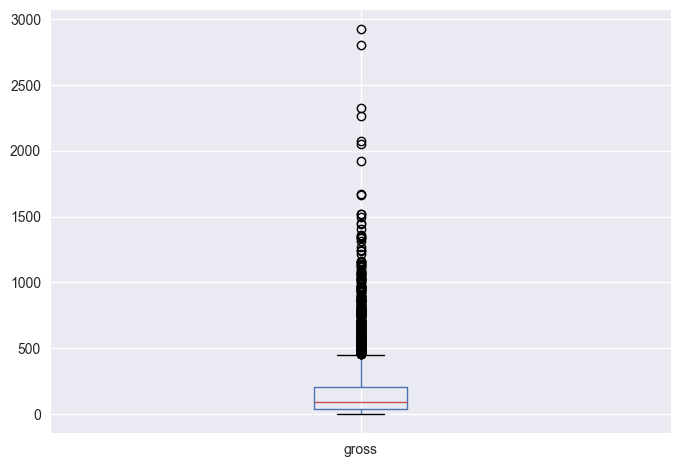

In [26]:
df.boxplot(column=['gross'])

## Removing Outliers

In [27]:
z_scores = stats.zscore(df['gross'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

In [28]:
df.head()

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors,year,month
0,tt0035423,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48.0,76.019048,2001-12-11,James Mangold,2001,Dec
1,tt0065421,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4.0,35.459543,1970-12-11,Wolfgang Reitherman,1970,Dec
2,tt0065938,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4.0,5.200000,1970-01-01,Brian G. Hutton,1970,Jan
3,tt0066026,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3.5,81.600000,1970-01-25,Robert Altman,1970,Jan
4,tt0066206,Patton,172,"Biography,Drama,War",7.9,106476,12.0,61.749765,1970-02-04,Franklin J. Schaffner,1970,Feb


<Axes: >

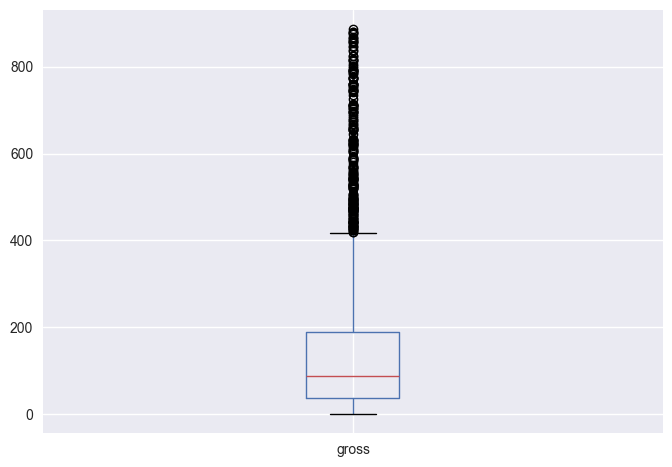

In [29]:
# replot boxbolt to verify outliers
df.boxplot(column=['gross'])

## Investigation through Imagery and Final Thoughts


## Correlation analysis
Let's see is there any trend or relation between gross reveneu  and other feature like budget, number of votes etc. 
First we created scatter plot to see any trend then we further anlsyse using correlation plot.

In [30]:
df.head()

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors,year,month
0,tt0035423,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48.0,76.019048,2001-12-11,James Mangold,2001,Dec
1,tt0065421,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4.0,35.459543,1970-12-11,Wolfgang Reitherman,1970,Dec
2,tt0065938,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4.0,5.200000,1970-01-01,Brian G. Hutton,1970,Jan
3,tt0066026,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3.5,81.600000,1970-01-25,Robert Altman,1970,Jan
4,tt0066206,Patton,172,"Biography,Drama,War",7.9,106476,12.0,61.749765,1970-02-04,Franklin J. Schaffner,1970,Feb


Text(0.5, 1.0, 'Gross Revenue vs Budget')

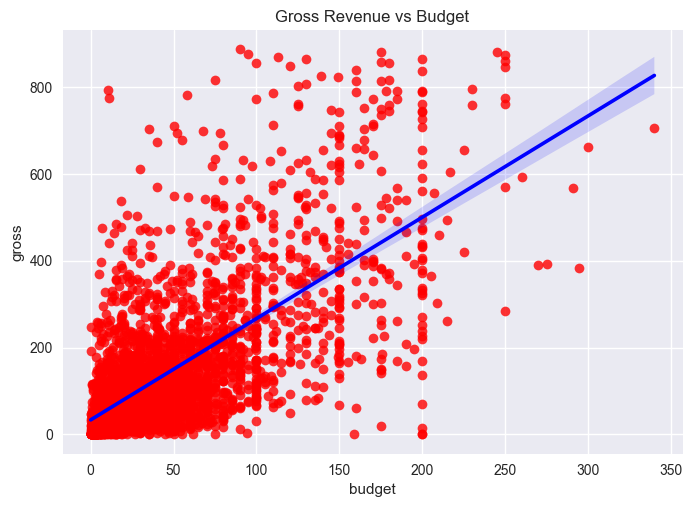

In [31]:
# Try to find any correlation beteen gross and other parameters
sns.regplot(x="budget", y="gross", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('Gross Revenue vs Budget')

This graph shows that there is a strong connection between a movie's budget and its gross earnings.

# Correlation Matrix
Let's examine the relationship between the other variables more closely to identify which one has the strongest correlation with gross earnings.

We should convert all the columns to numeric values. This will allow us to display the correlation between all variables, not just the numerical ones. It will help us better understand which variables are strongly or weakly correlated

In [32]:
df_numerized = df.copy() # shallow copy to avoid any changes in original data

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category').cat.codes
        
df_numerized

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors,year,month
0,0,1233,118,160,6.4,87925,48.0,76.019048,2001-12-11,484,2001,2
1,1,2205,78,68,7.1,111758,4.0,35.459543,1970-12-11,1283,1970,2
2,2,1239,144,84,7.6,52628,4.0,5.200000,1970-01-01,136,1970,4
3,3,1378,116,149,7.4,75784,3.5,81.600000,1970-01-25,1030,1970,4
4,4,1681,172,126,7.9,106476,12.0,61.749765,1970-02-04,371,1970,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3343,3083,1590,107,210,7.3,175977,5.0,39.458207,2020-09-11,173,2020,11
3344,3084,2727,138,6,6.6,220617,200.0,14.400000,2021-06-30,180,2021,6
3345,3085,1210,126,120,7.4,88568,26.0,7.478009,2021-02-01,1112,2021,3
3346,3086,731,88,10,5.7,56955,15.0,65.774490,2021-07-01,7,2021,5


In [33]:
df.head() 

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors,year,month
0,tt0035423,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48.0,76.019048,2001-12-11,James Mangold,2001,Dec
1,tt0065421,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4.0,35.459543,1970-12-11,Wolfgang Reitherman,1970,Dec
2,tt0065938,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4.0,5.200000,1970-01-01,Brian G. Hutton,1970,Jan
3,tt0066026,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3.5,81.600000,1970-01-25,Robert Altman,1970,Jan
4,tt0066206,Patton,172,"Biography,Drama,War",7.9,106476,12.0,61.749765,1970-02-04,Franklin J. Schaffner,1970,Feb


In [34]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Let filter out correlation greater than 0.5.
# Correlation coefficient  greather than .50 means strong correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

gross         budget          0.679766
budget        gross           0.679766
id            release_date    0.924705
release_date  id              0.924705
year          id              0.924839
id            year            0.924839
release_date  year            0.999672
year          release_date    0.999672
directors     directors       1.000000
release_date  release_date    1.000000
genres        genres          1.000000
rating        rating          1.000000
runtime       runtime         1.000000
id            id              1.000000
budget        budget          1.000000
gross         gross           1.000000
no_of_votes   no_of_votes     1.000000
title         title           1.000000
year          year            1.000000
month         month           1.000000
dtype: float64

In [35]:
# make sure original df do not numerized
df.head() 

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors,year,month
0,tt0035423,Kate & Leopold,118,"Comedy,Fantasy,Romance",6.4,87925,48.0,76.019048,2001-12-11,James Mangold,2001,Dec
1,tt0065421,The AristoCats,78,"Adventure,Animation,Comedy",7.1,111758,4.0,35.459543,1970-12-11,Wolfgang Reitherman,1970,Dec
2,tt0065938,Kelly's Heroes,144,"Adventure,Comedy,War",7.6,52628,4.0,5.200000,1970-01-01,Brian G. Hutton,1970,Jan
3,tt0066026,M*A*S*H,116,"Comedy,Drama,War",7.4,75784,3.5,81.600000,1970-01-25,Robert Altman,1970,Jan
4,tt0066206,Patton,172,"Biography,Drama,War",7.9,106476,12.0,61.749765,1970-02-04,Franklin J. Schaffner,1970,Feb


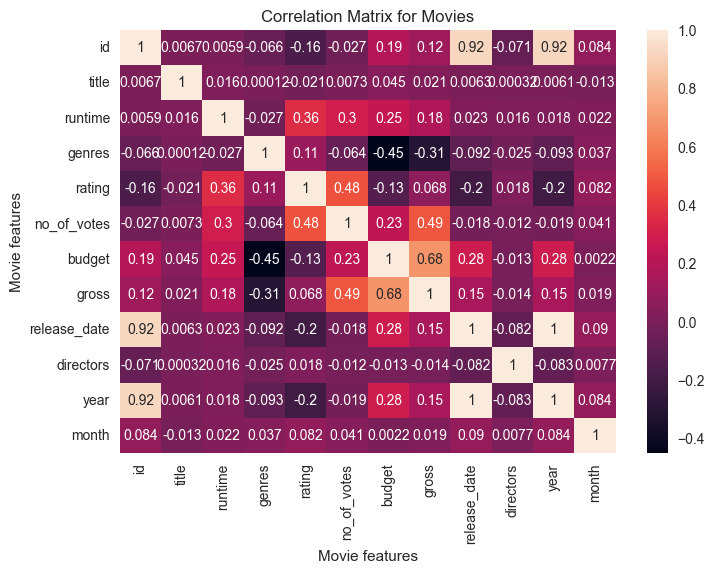

In [36]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

Conclusion: The most significant factors influencing a movie's success are the number of votes and the budget, as they show the strongest correlation. Additionally, it was found that the company, movie title, and genre have no correlation with success.

Although we've identified the key factors driving a movie's success, there are still several other factors we can investigate further.

- What is the best time of year to release a movie?
- What is the ideal runtime for a movie?
- What genre of movie had the most success on average?
- What genre of movie has the most success overall?


### What is the best time of year to release a movie?
We can address this question by organizing the gross earnings by month.

In [37]:
df.groupby(['month']).mean(numeric_only=True)

,runtime,rating,no_of_votes,budget,gross,year
month,,,,,,
Apr,108.832370,6.526012,172403.947977,47.339890,133.243303,2004.473988
Aug,109.168142,6.610177,185491.035398,37.815929,112.500416,2006.225664
Dec,121.725552,6.935016,225886.082019,50.455377,151.958760,2001.050473
Feb,110.054945,6.546703,173340.456044,47.449022,125.391689,2006.791209
Jan,104.886179,6.673984,165020.426829,26.207171,80.365820,2009.117886
Jul,110.765625,6.563281,211582.695312,57.592016,164.636315,2003.429688
Jun,111.683824,6.573529,235843.680147,67.330882,220.735238,2002.301471
Mar,107.551020,6.553061,201669.379592,46.650151,136.318954,2007.065306
May,116.627329,6.947205,261684.273292,57.040497,195.940652,2005.319876


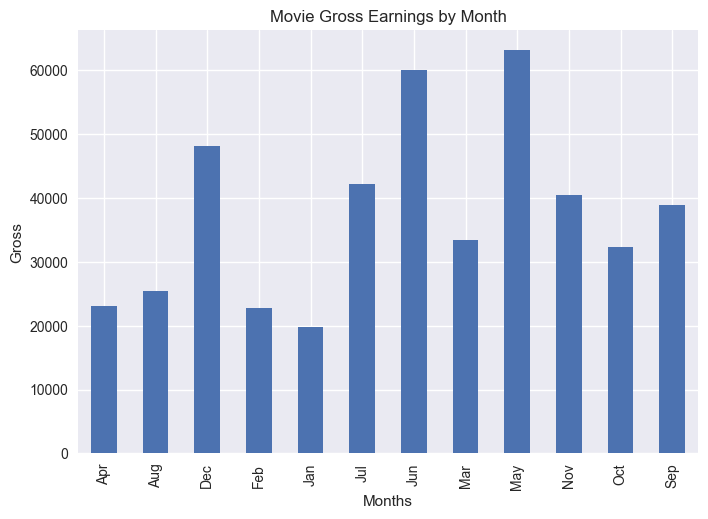

In [38]:
# let's plot the above results
df.groupby(['month']).sum(numeric_only=True).gross.plot(kind='bar')
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()

In the figure above, the x-axis labels are poorly organized. To fix this, we'll create a categorical column for the months and arrange them in the correct order.

In [39]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['month_cat'] = pd.Categorical(df['month'], categories=months, ordered=True)

Text(0.5, 0, 'Months')

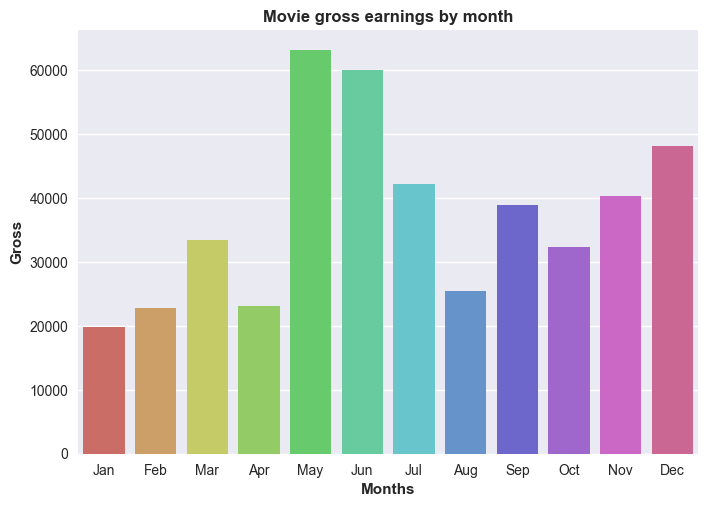

In [40]:
# replot above plot using seaborn
ax = sns.barplot(df, x="month_cat", y="gross", estimator="sum", errorbar=None,  palette = 'hls')
plt.title('Movie gross earnings by month',weight = "bold")
plt.ylabel('Gross',weight = "bold")
plt.xlabel('Months',weight = "bold")

Text(0, 0.5, 'Months')

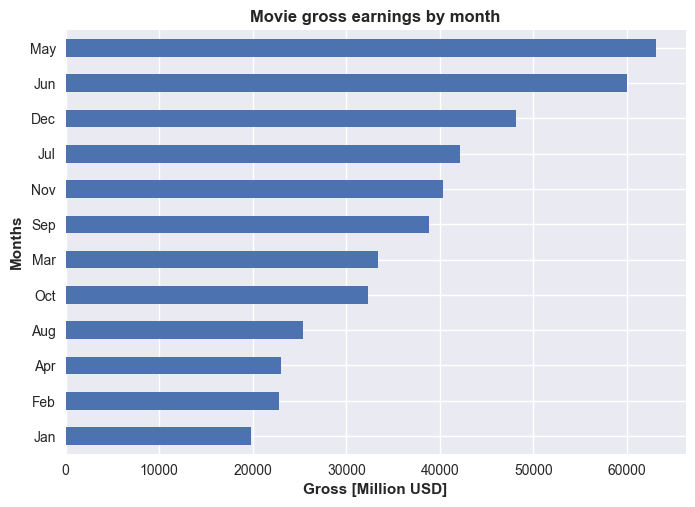

In [41]:
df.groupby(['month_cat']).sum(numeric_only=True).gross.sort_values().plot(kind='barh')
plt.title('Movie Gross Earnings by Month')
plt.title('Movie gross earnings by month',weight = "bold")
plt.xlabel('Gross [Million USD]',weight = "bold")
plt.ylabel('Months',weight = "bold")

Conclusion: Based on overall gross earnings, the ideal months to release a movie are May, June, and December.

## What is the ideal runtime for a movie?

In [42]:
gross_earnings_avg = df.groupby(['runtime'])['gross'].mean().sort_values()
gross_earnings_avg

runtime
185      0.245878
63       0.493937
209      0.968853
229      5.474090
198      6.797958
          ...    
142    451.639347
187    556.906378
163    613.032747
149    655.213667
176    772.245583
Name: gross, Length: 121, dtype: float64

In [43]:
# filter out gross earning above 200 million
gross_earnings_avg = gross_earnings_avg[gross_earnings_avg.values > 200] 
gross_earnings_avg

runtime
138    201.633125
175    208.820004
127    222.201578
158    224.031881
141    224.451112
130    225.182686
145    229.569836
147    237.494462
132    237.854116
156    238.995719
140    239.201530
144    242.652427
136    247.145812
183    249.147662
148    250.736068
150    254.720166
154    265.133893
161    297.790167
143    321.491123
195    322.161245
151    331.341831
166    335.802786
180    406.878233
169    419.926076
181    424.208848
142    451.639347
187    556.906378
163    613.032747
149    655.213667
176    772.245583
Name: gross, dtype: float64

Text(0.5, 1.0, 'Runtime vs Average Gross Earnings')

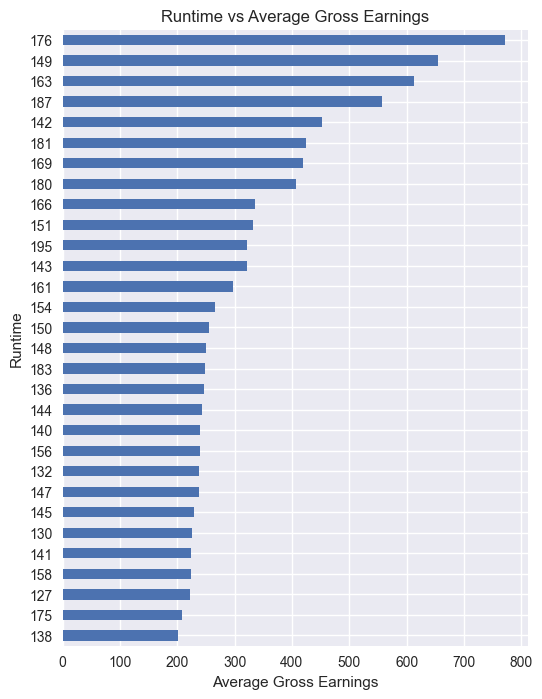

In [44]:
plt.figure(figsize=(6, 8))
gross_earnings_avg.plot(kind='barh')
plt.ylabel('Runtime')
plt.xlabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

Conclusion: Gross earning is more for long runtime movies. Let further examin the runtime.

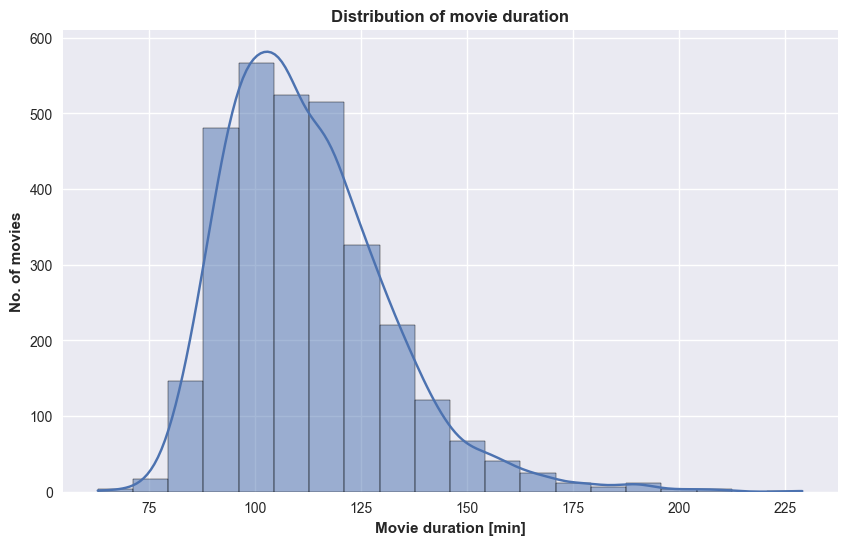

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins=20, kde=True)
plt.title('Distribution of movie duration', weight = "bold")
plt.ylabel("No. of movies", weight = "bold")
plt.xlabel("Movie duration [min]", weight = "bold")
plt.show()

Most of the movies have runtime between 80 and 130 minutes.

<Axes: xlabel='year', ylabel='runtime'>

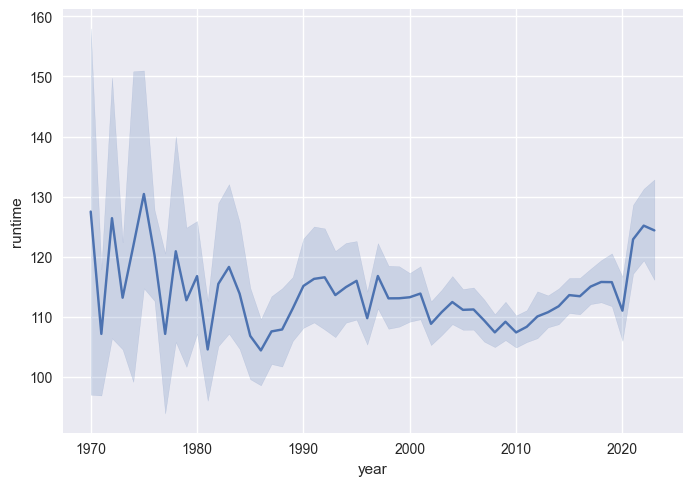

In [46]:
sns.lineplot(y='runtime', x='year', data=df, markers=True)

Conclusion: Average runtime of the moves remains same over the years. 

## What genre of movie has the most success overall?

In [47]:
df.groupby(['genres'])['gross'].agg(['sum', 'mean'])

,sum,mean
genres,,
Action,20.546518,20.546518
"Action,Adventure",3143.136647,449.019521
"Action,Adventure,Animation",12718.953234,326.127006
"Action,Adventure,Biography",513.665904,73.380843
"Action,Adventure,Comedy",21170.609219,225.219247
...,...,...
"Mystery,Thriller",1247.357961,207.892994
"Romance,Sci-Fi",28.744356,28.744356
"Sci-Fi,Thriller",202.020013,101.010007


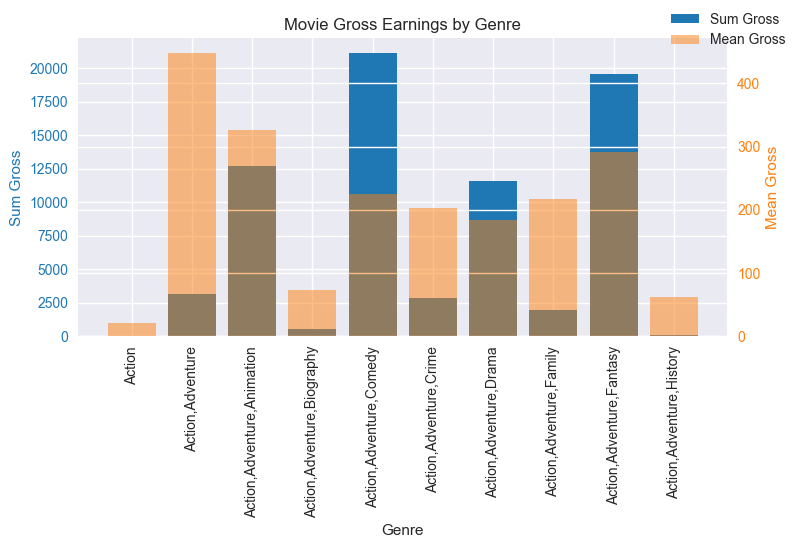

In [48]:
# Get the sum and mean of gross earnings for each genre
grouped_df = df.groupby(['genres'])['gross'].agg(['sum', 'mean'])
genres = grouped_df.index.tolist()[:10]
sum_gross = grouped_df['sum'].tolist()[:10]
mean_gross = grouped_df['mean'].tolist()[:10]

# Set up the bar chart
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)


# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean Gross')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean Gross', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()

In [49]:
# function to count each genre 
def get_count(column_name, sep=','):
    data = df[column_name].str.cat(sep = sep) # concat all genres into a long string  
    # Create a series using above concatenated string
    data = pd.Series(data.split(sep))   # split the genres by ,
    # Count in descending order
    count = data.value_counts(ascending = False) # count each genres 
    return count

In [50]:
# use the function created above to split genres and count the occurrence of each one
genre_count = get_count('genres',',')

In [51]:
genre_count[0:10]

Drama        1440
Comedy       1115
Action       1058
Adventure     790
Crime         594
Thriller      577
Romance       425
Horror        379
Mystery       354
Sci-Fi        342
Name: count, dtype: int64

In [52]:
type(genre_count)

pandas.core.series.Series

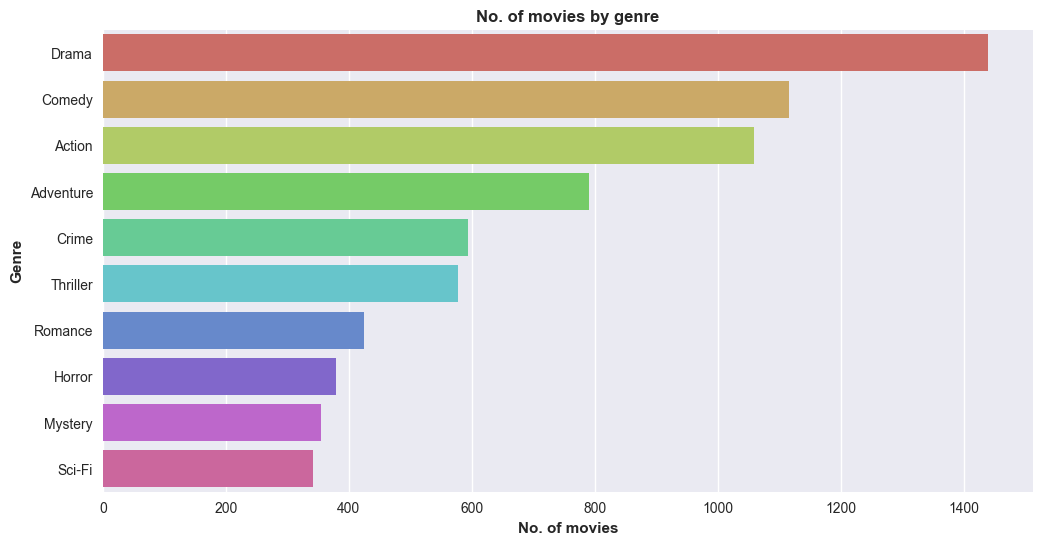

In [53]:
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(genre_count[0:10], palette = 'hls', orient='h' ) 
ax.set_title('No. of movies by genre',weight = "bold")
ax.set_xlabel('No. of movies',weight = "bold")
ax.set_ylabel('Genre',weight = "bold")
plt.show()

Conclusion: Drama, Comedy, and Action are the most popular movie genres.

## Which director has made more movies?

In [54]:
director_count = get_count('directors',',')[:10]
director_count

Steven Spielberg     29
Ridley Scott         22
Martin Scorsese      20
Clint Eastwood       19
Ron Howard           19
Tim Burton           16
Robert Zemeckis      15
Woody Allen          14
Richard Donner       13
Steven Soderbergh    13
Name: count, dtype: int64

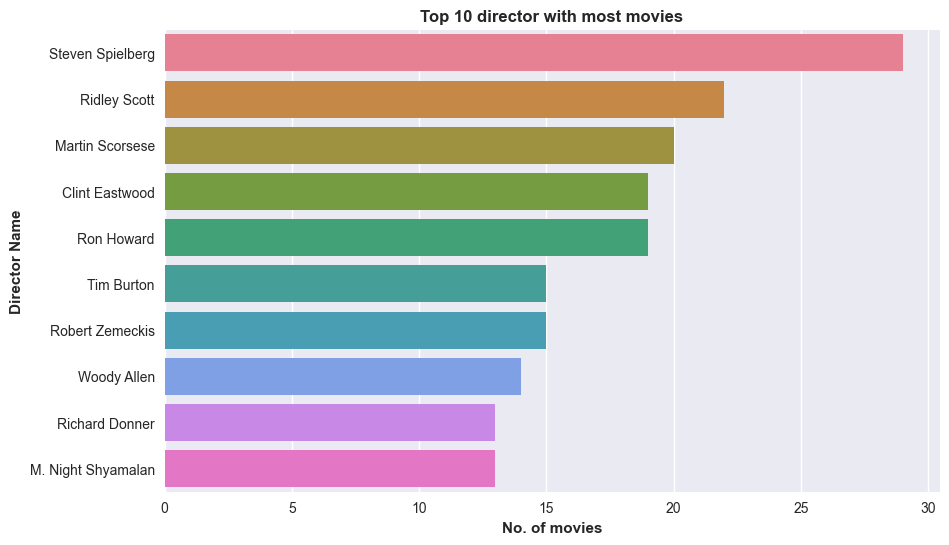

In [55]:
top_directors = df['directors'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(top_directors, palette = 'husl', orient='h')
plt.title('Top 10 director with most movies', weight = "bold")
plt.ylabel('Director Name', weight = "bold")
plt.xlabel("No. of movies", weight = "bold")
plt.show()

Steven Spielberg has made the highest number of movies

## Top 10 popular movies by votes?

In [56]:
# top 10 voted movies
top_voted = df.sort_values(['no_of_votes'], ascending = False)[:10]
top_voted

,id,title,runtime,genres,rating,no_of_votes,budget,gross,release_date,directors,year,month,month_cat
529,tt0111161,The Shawshank Redemption,142,Drama,9.3,2817283,25.0,28.884716,1994-09-10,Frank Darabont,1994,Sep,Sep
2323,tt1375666,Inception,148,"Action,Adventure,Sci-Fi",8.8,2484142,160.0,839.030630,2010-07-08,Christopher Nolan,2010,Jul,Jul
837,tt0137523,Fight Club,139,Drama,8.8,2252204,63.0,101.209702,1999-09-10,David Fincher,1999,Sep,Sep
508,tt0109830,Forrest Gump,142,"Drama,Romance",8.8,2194012,55.0,678.226465,1994-06-23,Robert Zemeckis,1994,Jun,Jun
523,tt0110912,Pulp Fiction,154,"Crime,Drama",8.9,2160463,8.0,213.928762,1994-05-21,Quentin Tarantino,1994,May,May
1829,tt0816692,Interstellar,169,"Adventure,Drama,Sci-Fi",8.7,2009279,165.0,703.170837,2014-10-26,Christopher Nolan,2014,Oct,Oct
826,tt0133093,The Matrix,136,"Action,Sci-Fi",8.7,2002929,63.0,467.222728,1999-03-24,"Lana Wachowski, Lilly Wachowski",1999,Mar,Mar
17,tt0068646,The Godfather,175,"Crime,Drama",9.2,1963432,6.0,250.341816,1972-03-14,Francis Ford Coppola,1972,Mar,Mar
585,tt0114369,Se7en,127,"Crime,Drama,Mystery",8.6,1747022,33.0,327.333559,1995-09-15,David Fincher,1995,Sep,Sep
2633,tt1853728,Django Unchained,165,"Drama,Western",8.5,1647010,100.0,426.074373,2012-12-11,Quentin Tarantino,2012,Dec,Dec


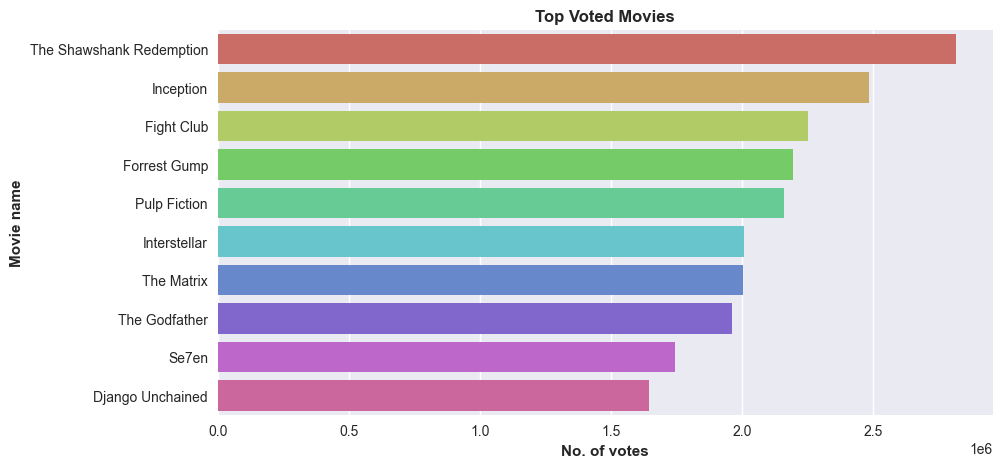

In [57]:
fig,axs=plt.subplots(figsize=(10,5))
g=sns.barplot(y=top_voted['title'],x=top_voted['no_of_votes'], palette = 'hls')
g.set_title("Top Voted Movies", weight = "bold")
g.set_xlabel("No. of votes", weight = "bold")
g.set_ylabel("Movie name", weight = "bold")
plt.show()

The Shawshank Redemption is the most liked movie by the users.

## Top 10 popular movies by IMDB rating?

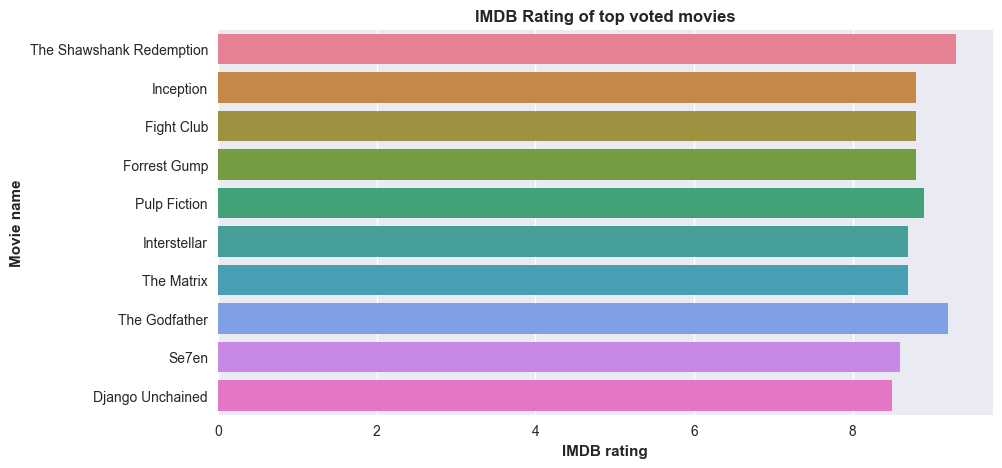

In [58]:
fig,axs=plt.subplots(figsize=(10,5))
g=sns.barplot(y=top_voted['title'],x=top_voted['rating'], palette = 'husl')
g.set_title("IMDB Rating of top voted movies", weight = "bold")
g.set_xlabel("IMDB rating", weight = "bold")
g.set_ylabel("Movie name", weight = "bold")
plt.show()

The Shawshank Redemption has highest IMDB rating as well as votes

## Top 10 movies with highest gross earning?

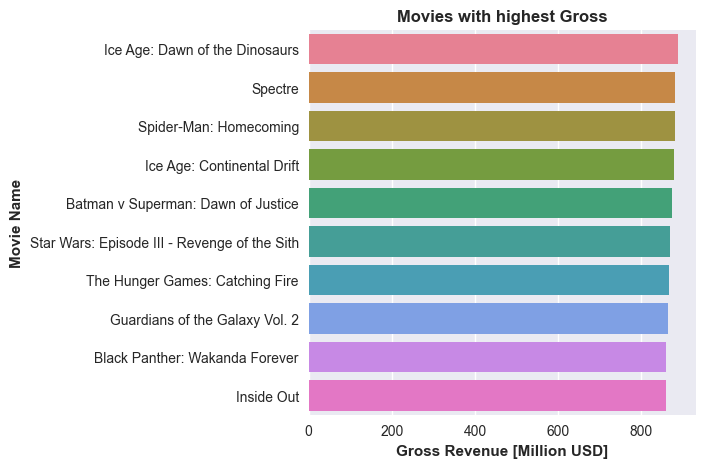

In [59]:

highest_earning = df.sort_values(['gross'], ascending = False)
fig,axs=plt.subplots(figsize=(5,5))
g=sns.barplot(y=highest_earning['title'][:10],x=highest_earning['gross'][:10], palette = 'husl')
g.set_title("Movies with highest Gross", weight = "bold")
g.set_ylabel("Movie Name",weight = "bold")
g.set_xlabel("Gross Revenue [Million USD]", weight = "bold")
plt.show()

The Shawshank Redemption has highest IMDB rating as well as votes but still is not the highest earing movie. Highest earning movie is Ace Age: Dawn of the Dinasaurs.

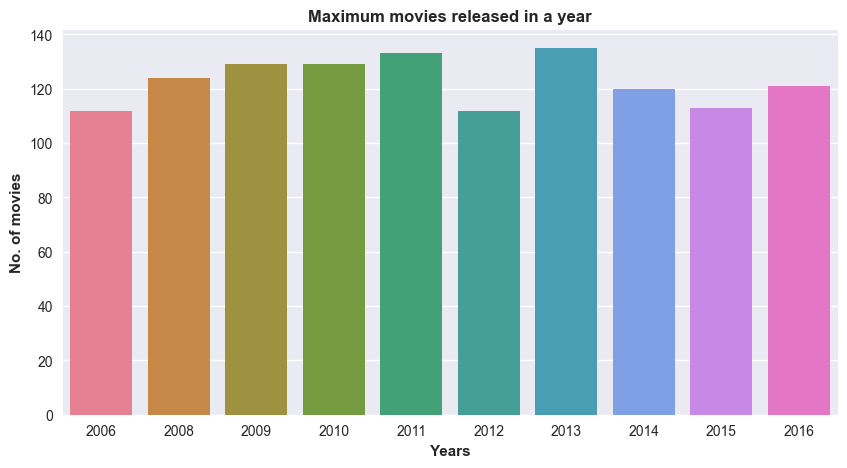

In [60]:
fig,axs=plt.subplots(figsize=(10,5))
g=sns.barplot(x=df['year'].value_counts()[:10].index, y=df['year'].value_counts()[:10], palette = 'husl')
g.set_title("Maximum movies released in a year", weight = "bold")
g.set_xlabel("Years", weight = "bold")
g.set_ylabel("No. of movies", weight = "bold")
plt.show()

On an average, around 120 movies release per year

Text(0, 0.5, 'Number of movies')

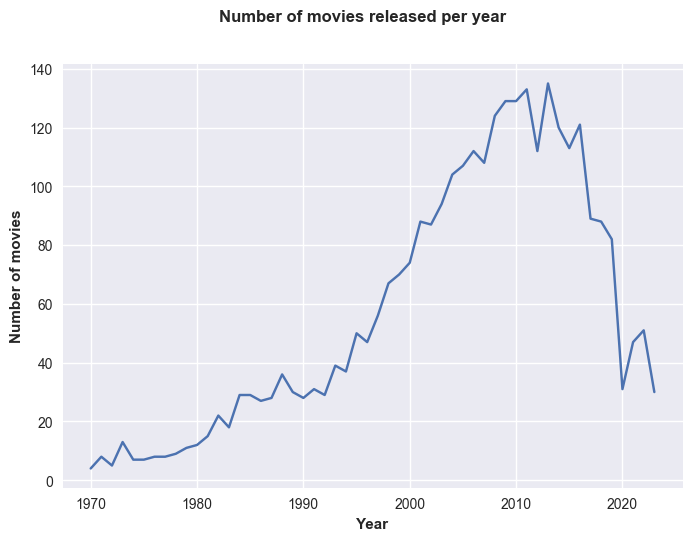

In [61]:
movie_count = df['year'].value_counts().sort_index()
# movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of movies released per year',weight = "bold" )
plt.xlabel('Year', weight = "bold")
plt.ylabel('Number of movies',weight = "bold")

The number of movies released per year increased until 2018, after which there was a significant decline. This drop may be attributed to the COVID-19 lockdown.

# Final thoughts

- Movie gross earnings are strongly correlated with both the budget and the number of votes.
- The optimal months for releasing a movie are May, June, and December.
- Although The Shawshank Redemption has the highest IMDb rating and number of votes, it is not the highest-grossing film. Ice Age: Dawn of the Dinosaurs holds the highest earnings.
- Most movies have a runtime ranging from 80 to 130 minutes.
- Steven Spielberg has directed the highest number of movies.